In [1]:
import pandas as pd
import numpy as np
from datetime import timedelta

import pandas_datareader as pdr

import requests_cache
session = requests_cache.CachedSession(cache_name='stocks-cache', backend='sqlite')

symbols = ['BTC-USD', 'GC=F', '^GSPC', '^IXIC', 'BNDW', 'VWOB', 'VTC']

data = {}
for sym in symbols:
    ts = pdr.DataReader(
        sym,
        start='2000-01-01',
        end='2020-10-10',
        data_source='yahoo',
        session=session
    ).Close
    data[sym] = ts

ranges = []
for sym, ts in data.items():
    diffs = ts.pct_change(365)
    ranges.append((sym, diffs.mean(), diffs.std(), diffs.quantile(.01), diffs.quantile(.99)))

In [2]:
ts = pdr.DataReader(
    'FXRU',
    start='2014-01-01',
    end='2021-03-01',
    data_source='moex',
    session=session
)
ts = ts[ts.BOARDID == 'TQTF'].CLOSE
ts[ts > 3000] = ts[ts > 3000]/10

usd = pdr.DataReader(
    'RUB=X',
    start='2014-01-01',
    end='2021-03-01',
    data_source='yahoo',
    session=session
).Close.fillna(method='backfill')

usd[usd < 1] = np.nan

tsu = ts/usd

diffs = tsu.pct_change(365)
ranges.append(('FXRU', diffs.mean(), diffs.std(), diffs.quantile(.01), diffs.quantile(.99)))


In [3]:
pd.DataFrame(ranges, columns=['symbol', 'mean', 'std', 'p.01', 'p.99']).set_index('symbol')

,mean,std,p.01,p.99
symbol,,,,
BTC-USD,2.010657,3.435328,-0.753969,16.586330
GC=F,0.167667,0.207953,-0.248471,0.596854
^GSPC,0.082707,0.196766,-0.442338,0.387722
^IXIC,0.120855,0.268009,-0.559108,0.621944
BNDW,0.076445,0.012104,0.029157,0.091041
VWOB,0.003255,0.048320,-0.089289,0.101242
VTC,0.084325,0.046511,-0.017367,0.151482
FXRU,0.076185,0.056338,-0.047023,0.254182


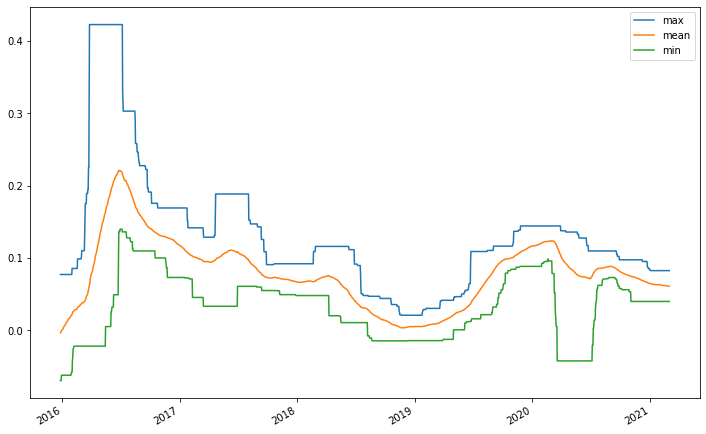

In [4]:

tsu.pct_change(365).rolling(90).agg(['max', 'mean', 'min']).plot(figsize=(12,8));